# K-means Clustering of Retail Store Customers

## Problem Statement
The goal of this project is to group customers of a retail store based on their purchase history. By clustering customers, the store aims to identify distinct customer segments, understand their behavior, and tailor marketing strategies to meet the needs of each segment more effectively. 

We will use the K-means clustering algorithm to achieve this goal. The dataset provided includes the following features:
1. `CustomerID`: Unique identifier for each customer.
2. `Gender`: Gender of the customer.
3. `Age`: Age of the customer.
4. `Annual Income (k$)`: Annual income of the customer in thousands of dollars.
5. `Spending Score (1-100)`: Score assigned by the store based on customer behavior and spending nature.


In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Reading and Understanding the Data

In [5]:
# Loading the dataset
df = pd.read_csv('Mall_Customers (1).csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

_

There is no need for cleaning the data since there is no null values...

### Visualizing The Data

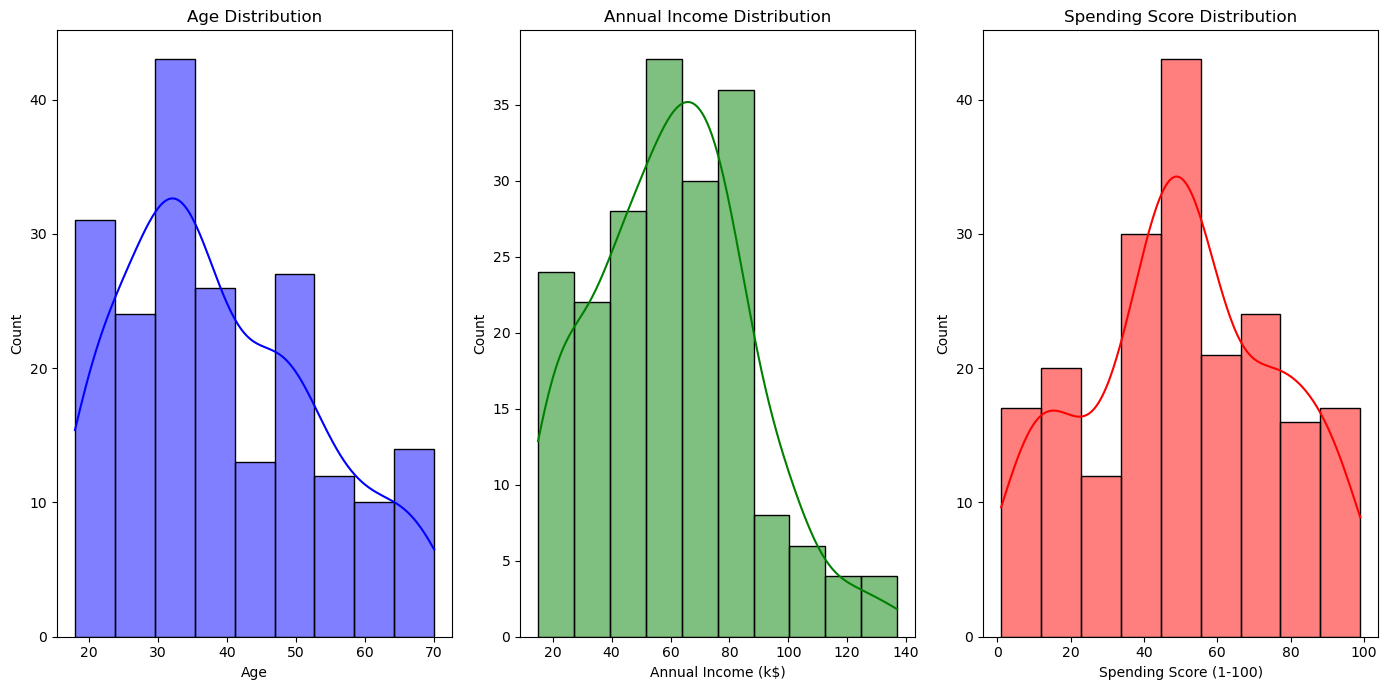

In [12]:
# Distribution plots for numerical features
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='green')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

- The age distribution shows that the majority of the customers are between 20 and 40 years old. There is a noticeable peak around the age of 30.
- The annual income distribution reveals that most customers have an income between 40k and 80k dollars. There are fewer customers with extremely high or low incomes.
- The spending score distribution indicates that most customers have a spending score between 40 and 60, with a peak around 50. This suggests a balanced distribution of spending behavior among customers.


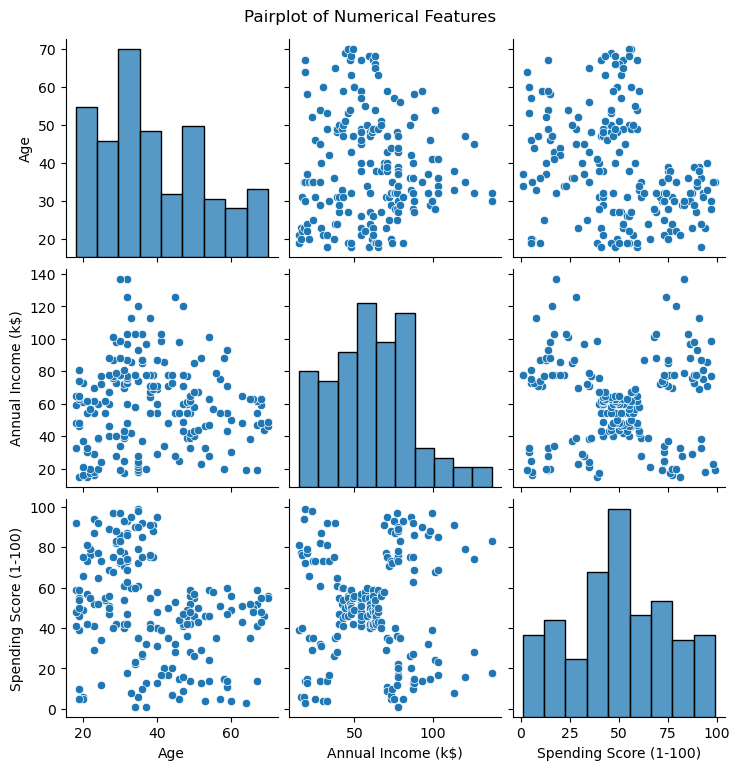

In [14]:
# Pairplot to visualize relationships between features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

##### So it is clear that we need only `Annual Income` & `Spending Score` as our important columns for clustering 

In [16]:
# Selecting features for clusttering 
df_features=df[['Annual Income (k$)','Spending Score (1-100)']]

### Finding the Optimal Number of Clusters


In [18]:
# Elbow Method (Sum of Square Distances) for Optimal Number of Clusters
# Initializing a list to store the SSD for each number of clusters
ssd = []

# Define the range for the number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
    kmeans.fit(df_features)
    ssd.append(kmeans.inertia_)

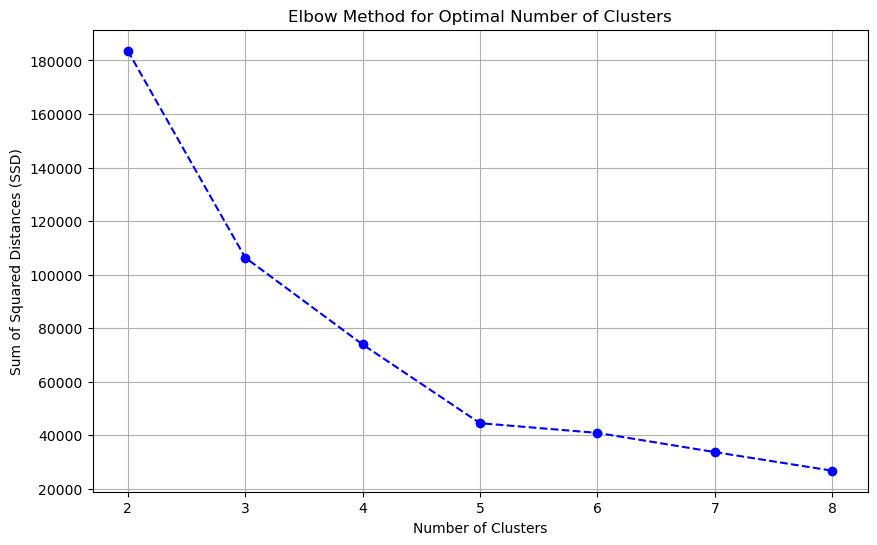

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, ssd, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

The elbow graph shows a noticeable bend around 3 or 5 clusters. This suggests that either 3 or 5 clusters could be optimal for our K-means clustering.

##### Applying K-means with 3 clusters

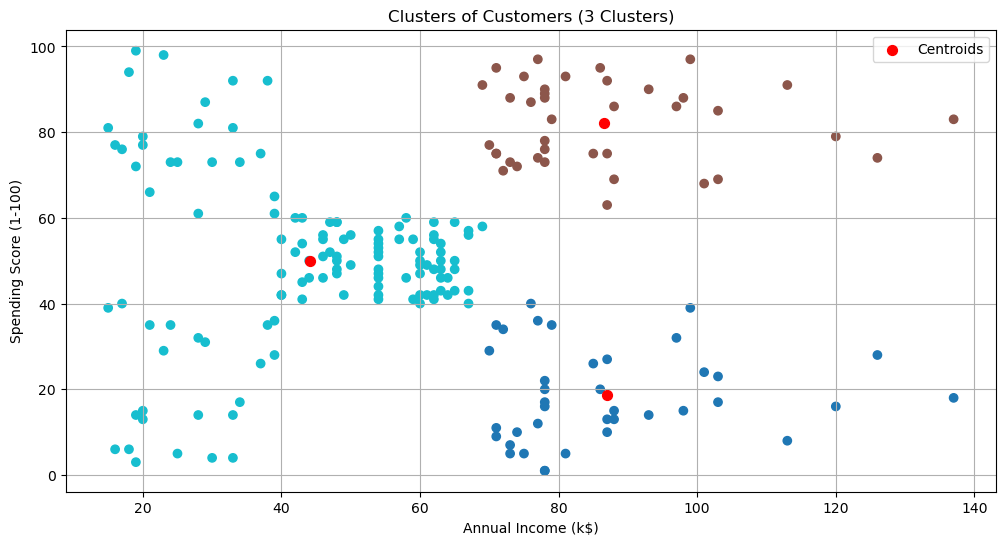

In [22]:
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters_3 = kmeans_3.fit_predict(df_features)

# Visualizing the clusters
plt.figure(figsize=(12, 6))
plt.scatter(df_features['Annual Income (k$)'], df_features['Spending Score (1-100)'], c=clusters_3, cmap='tab10', marker='o')
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], s=50, c='red', label='Centroids')
plt.title('Clusters of Customers (3 Clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

#### OBSERVATIONS

There are 3 distinct clusters.
- Cluster 1 (in blue) has a lower annual income compared to the other two clusters and a low to high range of average spending score .
- Cluster 2 (in brown) has a higher average annual income and a lower average spending score compared to cluster 3 (in yellow).
- Cluster 3 (in cyan) has the highest average annual income and the highest average spending score.

##### Applying K-means with 5 clusters


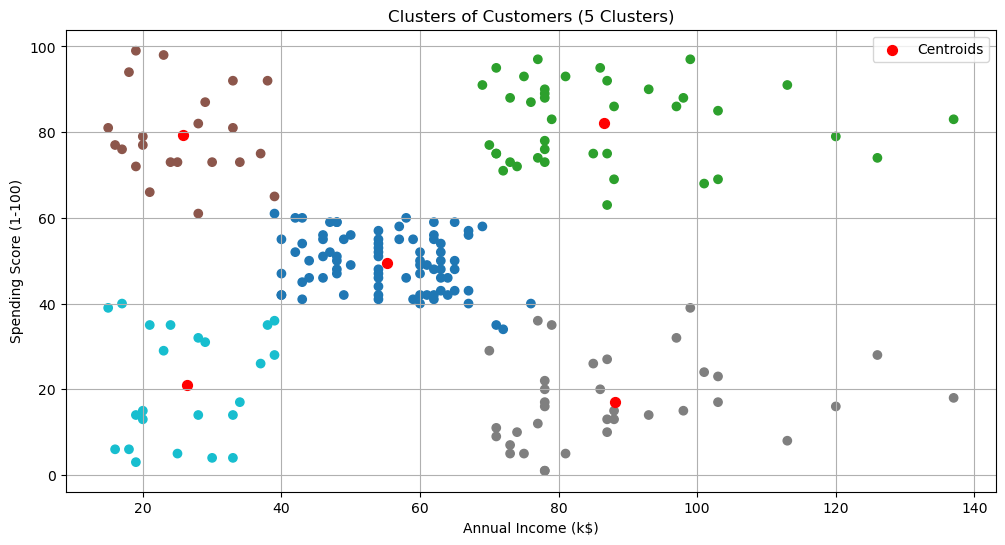

In [25]:
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters_5 = kmeans_5.fit_predict(df_features)

# Visualizing the clusters
plt.figure(figsize=(12, 6))
plt.scatter(df_features['Annual Income (k$)'], df_features['Spending Score (1-100)'], c=clusters_5, cmap='tab10', marker='o')
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], s=50, c='red', label='Centroids')
plt.title('Clusters of Customers (5 Clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

#### OBSERVATIONS

There are 5 distinct clusters.
- Customers in cluster 1 (in brown) tend to have a lower annual income and a lower spending score compared to the other clusters.
- Customers in cluster 2 (in grey) tend to have a lower annual income and a higher spending score.
- Customers in cluster 3 (in blue) tend to have a mid-range annual income and a mid-range spending score.
- Customers in cluster 4 (in green) tend to have a higher annual income and a lower spending score.
- Customers in cluster 5 (in cyan) tend to have a higher annual income and a higher spending score.

So its clear that the Optimal Number Of Clusters are 5. Lets recheck it with Silhouette Scores

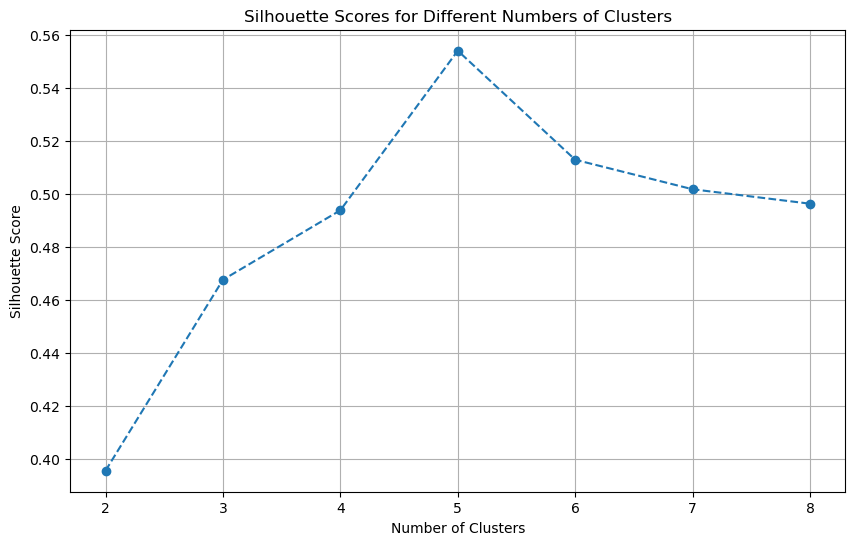

In [28]:
silhouette_scores = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
    clusters = kmeans.fit_predict(df_features)
    score = silhouette_score(df_features, clusters)
    silhouette_scores.append(score)

# Plot silhouette scores for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


### Conclusion
After analyzing the Elbow Method and Silhouette Scores, we concluded that 5 clusters are optimal for segmenting the customers based on their annual income and spending score. The visualizations clearly show distinct clusters, indicating meaningful customer segments that can help the retail store in targeted marketing and personalized services.